In [217]:
from multi_imbalance.datasets import load_datasets
import experiment as ex
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from multi_imbalance.utils.metrics import gmean_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from utils import plot_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [218]:
datasets = load_datasets()

In [219]:
ds_name = 'new_yeast'
test_on_all_folds = True
test_all_ds = False

In [220]:
datasets = ex.one_hot_encode_all(datasets)

In [221]:
config = ex.config_calculation_strategy2(datasets)

In [222]:
config['cmc'] = {'nn_config': {'units_1st_layer': 17,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.0005,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['dermatology'] = {'nn_config': {'units_1st_layer': 97,
   'units_2nd_layer': 512,
   'units_3rd_layer': 256,
   'units_latent_layer': 16},
  'weighted_triplet_loss': True,
  'lr': 0.0015,
  'batch_size': 16,
  'gamma': 0.95,
  'epochs': 50}

config['hayes-roth'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_vehicle'] = {'nn_config': {'units_1st_layer': 18,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['new_yeast'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 300,
  'units_3rd_layer': 200,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['balance-scale'] = {'nn_config': {'units_1st_layer': 16,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 3},
 'weighted_triplet_loss': True,
 'lr': 0.0004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland'] = {'nn_config': {'units_1st_layer': 24,
  'units_2nd_layer': 72,
  'units_3rd_layer': 48,
  'units_latent_layer': 16},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['cleveland_v2'] = {'nn_config': {'units_1st_layer': 23,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.004,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 100}

config['glass'] = {'nn_config': {'units_1st_layer': 9,
  'units_2nd_layer': 256,
  'units_3rd_layer': 128,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.001,
 'batch_size': 16,
 'gamma': 0.99,
 'epochs': 150}

config['thyroid-newthyroid'] = {'nn_config': {'units_1st_layer': 5,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['new_ecoli'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.005,
 'batch_size': 16,
 'gamma': 0.85,
 'epochs': 100}

config['new_led7digit'] = {'nn_config': {'units_1st_layer': 7,
  'units_2nd_layer': 64,
  'units_3rd_layer': 32,
  'units_latent_layer': 8},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 70}

config['new_winequality-red'] = {'nn_config': {'units_1st_layer': 11,
  'units_2nd_layer': 128,
  'units_3rd_layer': 64,
  'units_latent_layer': 12},
 'weighted_triplet_loss': True,
 'lr': 0.003,
 'batch_size': 16,
 'gamma': 0.95,
 'epochs': 100}

config['4delikatne-bezover-cut'] = {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100}

In [223]:
config

{'1czysty-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '2delikatne-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '3mocniej-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 16,
   'units_3rd_layer': 8,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.0001,
  'batch_size': 32,
  'gamma': 0.95,
  'epochs': 100},
 '4delikatne-bezover-cut': {'nn_config': {'units_1st_layer': 2,
   'units_2nd_layer': 64,
   'units_3rd_layer': 32,
   'units_latent_layer': 4},
  'weighted_triplet_loss': True,
  'lr': 0.003,
  'batch_size': 16,
  'gamma': 0.99,
  'epochs': 100},
 'balance-scale': {'nn_config': {'uni

In [224]:
def instantiate_classifiers():
    classifiers = {
            "RF24": RandomForestClassifier(random_state=0, min_samples_leaf=2, min_samples_split=4, class_weight='balanced'),
            "DT": DecisionTreeClassifier(random_state=0, min_samples_split=4, min_samples_leaf=2, class_weight='balanced'),
            "KNN": KNeighborsClassifier(n_neighbors=1)
        } 
    return classifiers

In [225]:
from experiment import dt_name_to_cols_to_encode

new_yeast


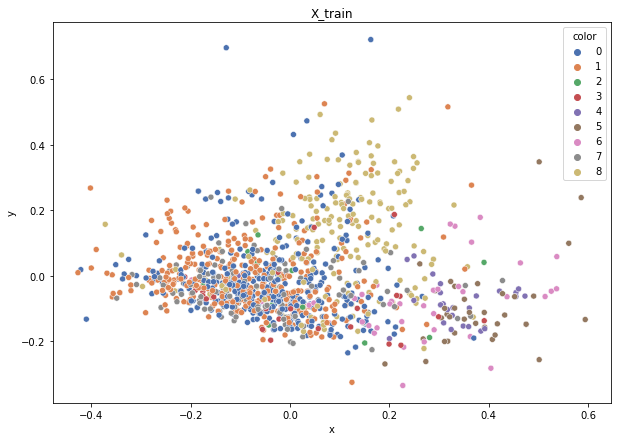

Class cardinalities: Counter({0: 370, 1: 343, 8: 195, 7: 135, 6: 40, 5: 36, 4: 28, 3: 24, 2: 16})
Weights: {8: 0.024325906642526016, 0: 0.012820410257547495, 1: 0.013829597070823827, 5: 0.1317653276470159, 4: 0.16941256411759187, 6: 0.11858879488231433, 3: 0.19764799147052386, 7: 0.03513742070587091, 2: 0.2964719872057858}


100%|██████████| 297/297 [00:00<00:00, 3404.00it/s]


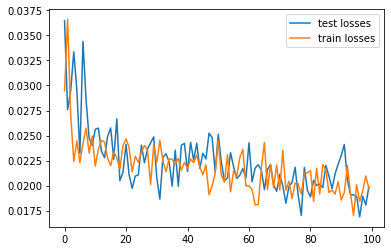

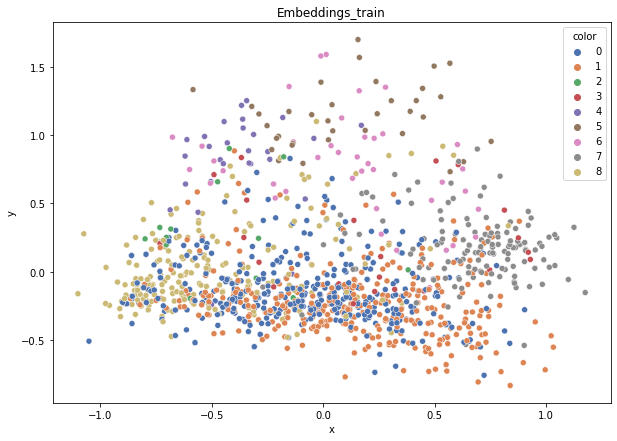

DT-f1-new-features: 0.498
DT-f1-old+new-features: 0.41
DT-f1-old-features: 0.495
DT-gmean-new-features: 0.526
DT-gmean-old+new-features: 0.228
DT-gmean-old-features: 0.272
KNN-f1-new-features: 0.525
KNN-f1-old+new-features: 0.513
KNN-f1-old-features: 0.511
KNN-gmean-new-features: 0.469
KNN-gmean-old+new-features: 0.485
KNN-gmean-old-features: 0.284
RF24-f1-new-features: 0.528
RF24-f1-old+new-features: 0.558
RF24-f1-old-features: 0.566
RF24-gmean-new-features: 0.286
RF24-gmean-old+new-features: 0.309
RF24-gmean-old-features: 0.313


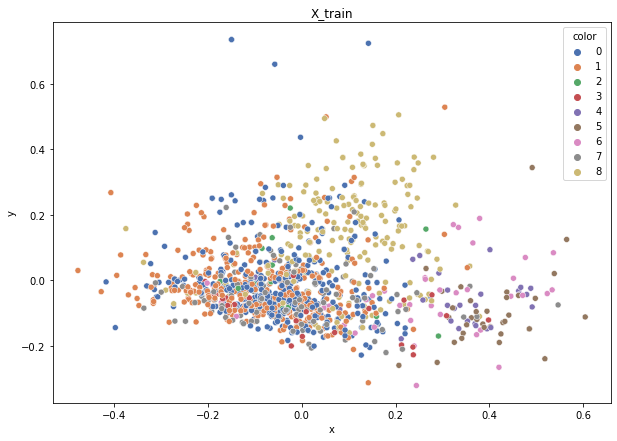

Class cardinalities: Counter({0: 371, 1: 343, 8: 195, 7: 134, 6: 41, 5: 35, 4: 28, 3: 24, 2: 16})
Weights: {1: 0.013814401543936261, 8: 0.02429917810035968, 0: 0.012771805200997676, 5: 0.13538113513057534, 6: 0.11556926169683263, 7: 0.035360744250523414, 3: 0.1974308220654224, 4: 0.16922641891321918, 2: 0.2961462330981336}


100%|██████████| 297/297 [00:00<00:00, 3416.08it/s]


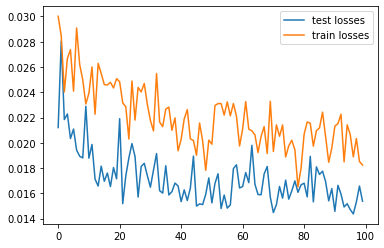

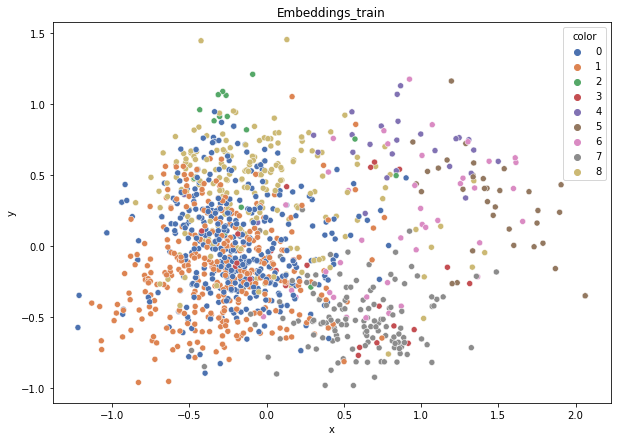

DT-f1-new-features: 0.412
DT-f1-old+new-features: 0.437
DT-f1-old-features: 0.453
DT-gmean-new-features: 0.404
DT-gmean-old+new-features: 0.247
DT-gmean-old-features: 0.26
KNN-f1-new-features: 0.48
KNN-f1-old+new-features: 0.501
KNN-f1-old-features: 0.546
KNN-gmean-new-features: 0.245
KNN-gmean-old+new-features: 0.259
KNN-gmean-old-features: 0.29
RF24-f1-new-features: 0.609
RF24-f1-old+new-features: 0.616
RF24-f1-old-features: 0.611
RF24-gmean-new-features: 0.327
RF24-gmean-old+new-features: 0.327
RF24-gmean-old-features: 0.331


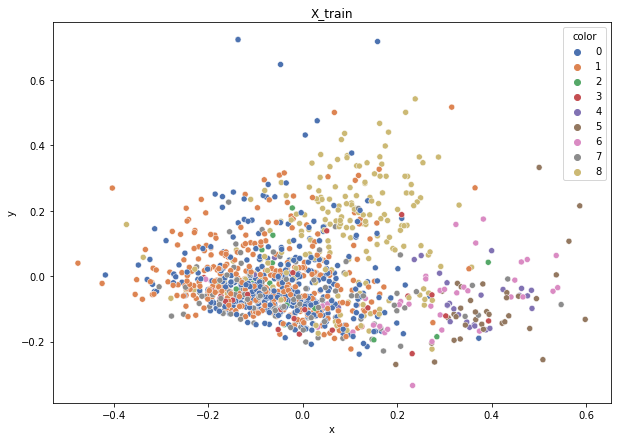

Class cardinalities: Counter({0: 371, 1: 343, 8: 195, 7: 134, 6: 41, 5: 35, 4: 28, 3: 24, 2: 16})
Weights: {8: 0.024299178100359677, 1: 0.01381440154393626, 0: 0.012771805200997674, 5: 0.13538113513057534, 4: 0.16922641891321916, 6: 0.11556926169683261, 7: 0.03536074425052341, 3: 0.19743082206542237, 2: 0.29614623309813354}


100%|██████████| 297/297 [00:00<00:00, 2467.62it/s]


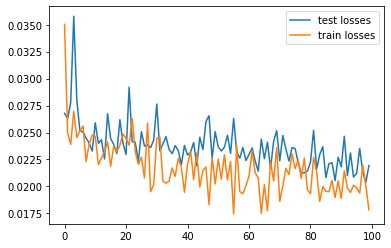

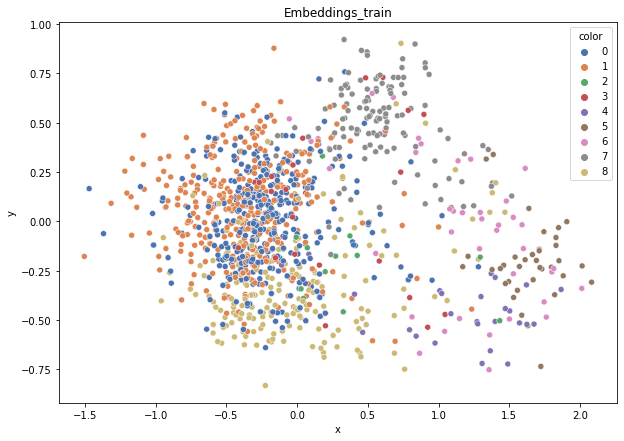

DT-f1-new-features: 0.43
DT-f1-old+new-features: 0.402
DT-f1-old-features: 0.408
DT-gmean-new-features: 0.256
DT-gmean-old+new-features: 0.385
DT-gmean-old-features: 0.408
KNN-f1-new-features: 0.473
KNN-f1-old+new-features: 0.413
KNN-f1-old-features: 0.447
KNN-gmean-new-features: 0.264
KNN-gmean-old+new-features: 0.236
KNN-gmean-old-features: 0.25
RF24-f1-new-features: 0.459
RF24-f1-old+new-features: 0.494
RF24-f1-old-features: 0.544
RF24-gmean-new-features: 0.258
RF24-gmean-old+new-features: 0.267
RF24-gmean-old-features: 0.477


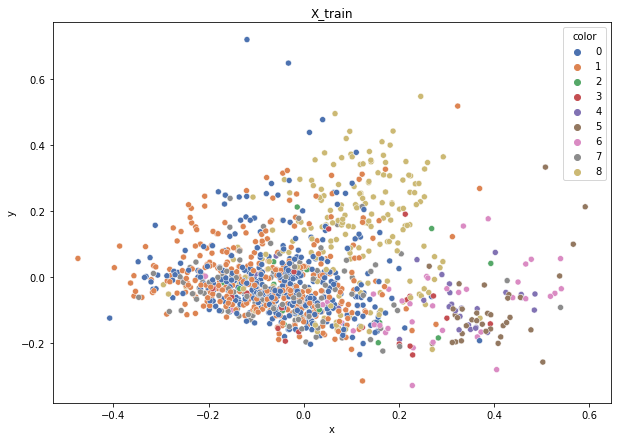

Class cardinalities: Counter({0: 370, 1: 344, 8: 195, 7: 134, 6: 41, 5: 35, 4: 28, 3: 24, 2: 16})
Weights: {8: 0.024299315142460837, 1: 0.013774321083662392, 0: 0.012806395818323955, 5: 0.13538189865085323, 4: 0.16922737331356652, 6: 0.11556991348243568, 7: 0.03536094367746166, 3: 0.1974319355324943, 2: 0.29614790329874147}


100%|██████████| 297/297 [00:00<00:00, 3157.26it/s]


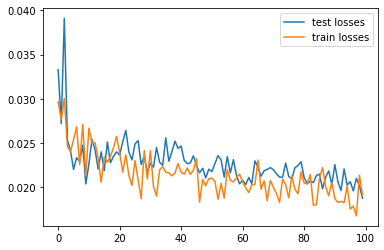

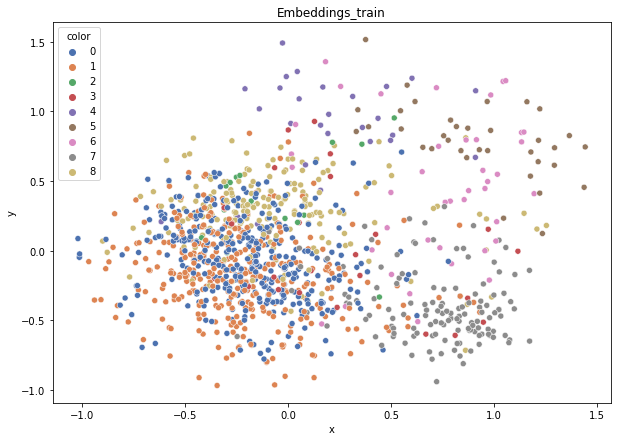

DT-f1-new-features: 0.409
DT-f1-old+new-features: 0.483
DT-f1-old-features: 0.439
DT-gmean-new-features: 0.244
DT-gmean-old+new-features: 0.471
DT-gmean-old-features: 0.248
KNN-f1-new-features: 0.434
KNN-f1-old+new-features: 0.459
KNN-f1-old-features: 0.464
KNN-gmean-new-features: 0.238
KNN-gmean-old+new-features: 0.428
KNN-gmean-old-features: 0.41
RF24-f1-new-features: 0.498
RF24-f1-old+new-features: 0.535
RF24-f1-old-features: 0.531
RF24-gmean-new-features: 0.263
RF24-gmean-old+new-features: 0.286
RF24-gmean-old-features: 0.277


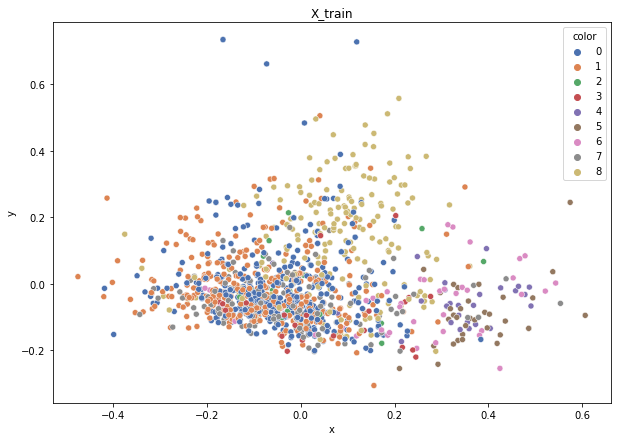

Class cardinalities: Counter({0: 370, 1: 343, 8: 196, 7: 135, 6: 41, 5: 35, 4: 28, 3: 24, 2: 16})
Weights: {8: 0.02418370057482606, 1: 0.013819257471329179, 0: 0.012810825169367322, 5: 0.13542872321902596, 4: 0.16928590402378244, 6: 0.11560988567477826, 7: 0.035111150464191915, 3: 0.1975002213610795, 2: 0.29625033204161927}


100%|██████████| 296/296 [00:00<00:00, 3190.41it/s]


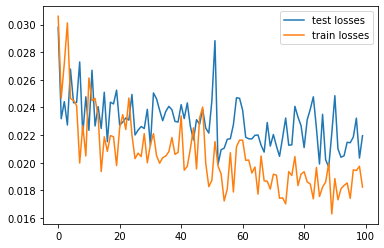

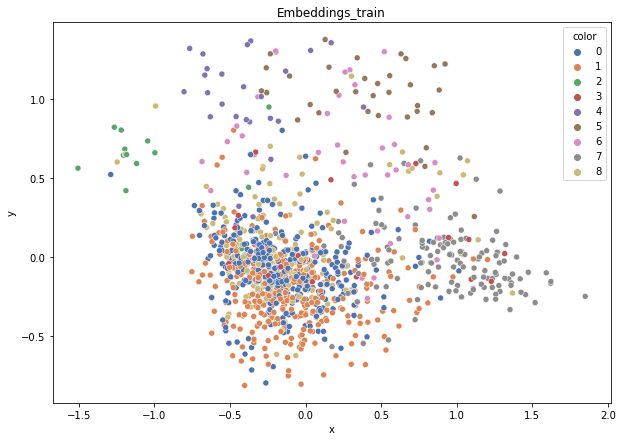

DT-f1-new-features: 0.4
DT-f1-old+new-features: 0.414
DT-f1-old-features: 0.425
DT-gmean-new-features: 0.229
DT-gmean-old+new-features: 0.241
DT-gmean-old-features: 0.237
KNN-f1-new-features: 0.376
KNN-f1-old+new-features: 0.441
KNN-f1-old-features: 0.49
KNN-gmean-new-features: 0.204
KNN-gmean-old+new-features: 0.399
KNN-gmean-old-features: 0.432
RF24-f1-new-features: 0.453
RF24-f1-old+new-features: 0.526
RF24-f1-old-features: 0.561
RF24-gmean-new-features: 0.237
RF24-gmean-old+new-features: 0.278
RF24-gmean-old-features: 0.293


In [226]:
result_dict = defaultdict(list)

if test_all_ds:
    ds_names = dt_name_to_cols_to_encode.keys()
else:
    ds_names = [ds_name]
for dataset_name in ds_names:
# for dataset_name in list(datasets.keys()):
    print(dataset_name)
    result_dict["dataset"].append(dataset_name)
    fold_result_dict = defaultdict(list)

    X, y = datasets[dataset_name]['data'], datasets[dataset_name]['target']
    X_encoded, y = datasets[f"{dataset_name}_encoded"]['data'], datasets[f"{dataset_name}_encoded"]['target']
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    n_splits = skf.get_n_splits(X, y)
    
    folds = []
    if test_on_all_folds:
        folds = skf.split(X, y)
    else:
        folds = list(skf.split(X, y))[1:2]
        
    for train_index, test_index in folds:
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        X_train_enc, X_test_enc = X_encoded[train_index], X_encoded[test_index]
        
        # PCA X_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(X_train), y_train)
        plt.title("X_train")
        plt.show()
        
        weights = ex.weights_calculation_strategy1(X_train, y_train)
        cfg =  config[dataset_name]
        # pretrain ANN triplets
        embeddings_train, embeddings_test = ex.train_triplets(X_train_enc, y_train, X_test_enc, y_test, weights,cfg)
        
        # PCA embeddings_train
        pca = PCA(n_components=2)
        plot_embeddings(pca.fit_transform(embeddings_train), y_train)
        plt.title("Embeddings_train")
        plt.show()
        
        X_train_new = np.hstack([X_train, embeddings_train])
        X_test_new = np.hstack([X_test, embeddings_test])
        
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(X_train_new, y_train)
            preds = clf.predict(X_test_new)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-old+new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-old+new-features"].append(gmean)
            
        classifiers = instantiate_classifiers()
        for clf_name, clf in classifiers.items():
            clf.fit(embeddings_train, y_train)
            preds = clf.predict(embeddings_test)

            gmean = gmean_score(y_test, preds)
            f1 = f1_score(y_test, preds, average='macro')
            fold_result_dict[f"{clf_name}-f1-new-features"].append(f1)
            fold_result_dict[f"{clf_name}-gmean-new-features"].append(gmean)
        for key in sorted(list(fold_result_dict.keys())):
            print(f"{key}: {np.round(fold_result_dict[key][-1],3)}")
            
    for k in fold_result_dict:
        result_dict[k].append(np.mean(fold_result_dict[k]))

In [227]:
results_df = pd.DataFrame.from_dict(result_dict)

In [228]:
results_df

,dataset,RF24-f1-old-features,RF24-gmean-old-features,DT-f1-old-features,DT-gmean-old-features,KNN-f1-old-features,KNN-gmean-old-features,RF24-f1-old+new-features,RF24-gmean-old+new-features,DT-f1-old+new-features,DT-gmean-old+new-features,KNN-f1-old+new-features,KNN-gmean-old+new-features,RF24-f1-new-features,RF24-gmean-new-features,DT-f1-new-features,DT-gmean-new-features,KNN-f1-new-features,KNN-gmean-new-features
0,new_yeast,0.562634,0.33819,0.443761,0.284857,0.491575,0.333038,0.545699,0.293351,0.429334,0.314306,0.465361,0.361579,0.50955,0.274113,0.429794,0.331668,0.457694,0.28406


In [229]:
results_df.filter(regex=("dataset|RF24-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-f1-old-features,RF24-f1-old+new-features,RF24-f1-new-features
0,new_yeast,0.562634,0.545699,0.509550


In [230]:
results_df.filter(regex=("dataset|RF24-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,RF24-gmean-old-features,RF24-gmean-old+new-features,RF24-gmean-new-features
0,new_yeast,0.338190,0.293351,0.274113


In [231]:
results_df.filter(regex=("dataset|DT-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-f1-old-features,DT-f1-old+new-features,DT-f1-new-features
0,new_yeast,0.443761,0.429334,0.429794


In [232]:
results_df.filter(regex=("dataset|DT-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,DT-gmean-old-features,DT-gmean-old+new-features,DT-gmean-new-features
0,new_yeast,0.284857,0.314306,0.331668


In [233]:
results_df.filter(regex=("dataset|KNN-f1*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-f1-old-features,KNN-f1-old+new-features,KNN-f1-new-features
0,new_yeast,0.491575,0.465361,0.457694


In [234]:
results_df.filter(regex=("dataset|KNN-gmean*")).style.highlight_max(color = 'lightgreen', axis = 1)

,dataset,KNN-gmean-old-features,KNN-gmean-old+new-features,KNN-gmean-new-features
0,new_yeast,0.333038,0.361579,0.284060
